## Занятие 2. Pytorch туториал

In [1]:
! python -V

Python 3.9.7


In [2]:
! pip show torch

Name: torch
Version: 1.12.1
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: c:\users\bzimka\anaconda3\envs\torch39\lib\site-packages
Requires: typing_extensions
Required-by: abbyy-course-cvdl-t2, efficientnet-pytorch, pretrainedmodels, sampling-argmax, stable-baselines3, timm, torchvision


In [3]:
import torch
import numpy as np

#### 1.1 Тензоры: создание и свойства

In [4]:
# создание тензоров
print(
    torch.zeros((2, 3)), 
)

print(
    torch.ones((3, 1)),
)

print(
    torch.rand((1, 2))
)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1.],
        [1.],
        [1.]])
tensor([[0.6078, 0.1277]])


In [5]:
# создание тензоров
print(
    torch.tensor(42),
)

print(
    torch.tensor(np.random.rand(1, 2))
)

tensor(42)
tensor([[0.1141, 0.4956]], dtype=torch.float64)


In [6]:
t = torch.zeros((3, 2)) + 0.9
t.dtype

torch.float32

In [7]:
print(
    t.double().dtype, 
    t.long().dtype
)

t, t.long()

torch.float64 torch.int64


(tensor([[0.9000, 0.9000],
         [0.9000, 0.9000],
         [0.9000, 0.9000]]),
 tensor([[0, 0],
         [0, 0],
         [0, 0]]))

In [8]:
# форма тензора 
t.shape, t.size()

(torch.Size([3, 2]), torch.Size([3, 2]))

In [9]:
t.device

device(type='cpu')

In [10]:
if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')

print(device)
t = t.to(device)

cuda:0


In [11]:
# копирование тензора - с формой, типом, девайсом
t, t.clone()

(tensor([[0.9000, 0.9000],
         [0.9000, 0.9000],
         [0.9000, 0.9000]], device='cuda:0'),
 tensor([[0.9000, 0.9000],
         [0.9000, 0.9000],
         [0.9000, 0.9000]], device='cuda:0'))

#### 1.2 Тензоры: индексация и изменение формы

In [12]:
t = torch.arange(18, device=device)

In [13]:
# интерпретация массива как многомерного тензора
t.view((2, 3, 3))

tensor([[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8]],

        [[ 9, 10, 11],
         [12, 13, 14],
         [15, 16, 17]]], device='cuda:0')

In [14]:
# можно сделать "срез" тензора также, как и в numpy
t_slice = t.view((2, 3, 3))[:, 1:, :]
t_slice

tensor([[[ 3,  4,  5],
         [ 6,  7,  8]],

        [[12, 13, 14],
         [15, 16, 17]]], device='cuda:0')

In [15]:
# булевая индексация
t_slice[t_slice % 2 == 0]

tensor([ 4,  6,  8, 12, 14, 16], device='cuda:0')

In [16]:
# превращение boolean маски - в список индексов True 
(t_slice % 2 == 0).nonzero()

tensor([[0, 0, 1],
        [0, 1, 0],
        [0, 1, 2],
        [1, 0, 0],
        [1, 0, 2],
        [1, 1, 1]], device='cuda:0')

In [17]:
# numel и nelement - количество элементов в тензоре
print(
    t_slice.numel(), 
    t_slice.nelement()    
)

12 12


In [18]:
# len возвращает не количество элементов, а длину первой оси
print(
    t_slice.shape,
    len(t_slice)
)

torch.Size([2, 2, 3]) 2


In [19]:
t_slice.shape

torch.Size([2, 2, 3])

In [20]:
# устанавливаем новый порядок всех осей
t_slice_permute = t_slice.permute(0, 2, 1)
print(t_slice)
print(t_slice_permute)

tensor([[[ 3,  4,  5],
         [ 6,  7,  8]],

        [[12, 13, 14],
         [15, 16, 17]]], device='cuda:0')
tensor([[[ 3,  6],
         [ 4,  7],
         [ 5,  8]],

        [[12, 15],
         [13, 16],
         [14, 17]]], device='cuda:0')


In [21]:
# меняем местами две оси
t_slice_tr = t_slice.transpose(1, 2)
print(t_slice)
print(t_slice_tr)

tensor([[[ 3,  4,  5],
         [ 6,  7,  8]],

        [[12, 13, 14],
         [15, 16, 17]]], device='cuda:0')
tensor([[[ 3,  6],
         [ 4,  7],
         [ 5,  8]],

        [[12, 15],
         [13, 16],
         [14, 17]]], device='cuda:0')


In [22]:
print(t_slice) 
print(t_slice.numel())

tensor([[[ 3,  4,  5],
         [ 6,  7,  8]],

        [[12, 13, 14],
         [15, 16, 17]]], device='cuda:0')
12


================================================================================
### **Вопрос-1**: что получится при исполнении строчки ниже?

================================================================================


### 1.3 Тензоры: объединение и разделение

In [31]:
# cat = concatenate
t2 = torch.cat([
    torch.zeros((1, 3, 3)),
    torch.ones((1, 3, 3))
], dim=2)
print(t2.shape)
t2

torch.Size([1, 3, 6])


tensor([[[0., 0., 0., 1., 1., 1.],
         [0., 0., 0., 1., 1., 1.],
         [0., 0., 0., 1., 1., 1.]]])

In [32]:
# ~un-concatenate вдоль оси
torch.unbind(t2, dim=2)

(tensor([[0., 0., 0.]]),
 tensor([[0., 0., 0.]]),
 tensor([[0., 0., 0.]]),
 tensor([[1., 1., 1.]]),
 tensor([[1., 1., 1.]]),
 tensor([[1., 1., 1.]]))

In [334]:
# ~un-concatenate вдоль оси на произвольные фрагменты
torch.split(t2, [2, 4], dim=2)

(tensor([[[0., 0.],
          [0., 0.],
          [0., 0.]]]),
 tensor([[[0., 1., 1., 1.],
          [0., 1., 1., 1.],
          [0., 1., 1., 1.]]]))

In [33]:
# "найди отличие" от concatenate?

t3 = torch.stack([
    torch.zeros((1, 3, 3)),
    torch.ones((1, 3, 3))
])
print(t3)

tensor([[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],


        [[[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]]]])


### 1.4 Тензоры: broadcast

In [34]:
# "единичные" оси можно убирать
print(
    t3.shape, 
    t3.squeeze(1).shape
)

torch.Size([2, 1, 3, 3]) torch.Size([2, 3, 3])


In [36]:
# "единичные" оси можно добавлять
t2.shape, t2.unsqueeze(3).shape

(torch.Size([1, 3, 6]), torch.Size([1, 3, 6, 1]))

In [37]:
# вдоль единичныз осей для операций срабатывает broadcast, аналогично numpy
a = torch.arange(3)
b = torch.arange(6)
a.unsqueeze(0) - b.unsqueeze(1)

tensor([[ 0,  1,  2],
        [-1,  0,  1],
        [-2, -1,  0],
        [-3, -2, -1],
        [-4, -3, -2],
        [-5, -4, -3]])

================================================================================
### **Задачка-1**
Даны два набора 64-мерных векторов: A\[ N, 64 \] и B\[ M, 64 \]

Надо найти i и j такие, что скалярное произведение (A\[ i \], B\[ j \]) максимально.

Решение должно работать для батчей A и B.

In [ ]:
torch.manual_seed(26092022)

a = torch.rand((2, 3, 64)) - 0.5
b = torch.randn((2, 13, 64))

#####
dot_product = # YOUR CODE HERE #
#####

assert dot_product.shape == (2, 3, 13)

max_val, max_flat_index = torch.max(
    dot_product.view((2, -1)), dim=-1
)
print(f"Per batch max values:\n{max_val}")
print(f"\nPer batch max indices:\n{(dot_product == max_val.view((2, 1, 1))).nonzero()}")

================================================================================

### 2.1 Модули: интерфейс и параметры

In [82]:
from torch import nn


class SoftmaxWithT(nn.Module):
    """
    y[b, i] = exp( x[b,i] / T ) / Sum[j]( exp(x[b, j] / T ) )
    """
    def __init__(self, temperature=1.0):
        super().__init__() # не забывайте вызывать родительский конструктор!
        # param
        self.t = torch.tensor([temperature])

    def forward(self, x: torch.Tensor):
        numer = torch.exp(x / self.t)
        denom = torch.sum(numer, axis=-1, keepdims=True)
        return numer / denom
        
sm = SoftmaxWithT()

In [67]:
t =  torch.randn(2, 5)
print(sm(t))
print(torch.nn.functional.softmax(t, dim=-1))

tensor([[0.1252, 0.0345, 0.7272, 0.0554, 0.0578],
        [0.1007, 0.2590, 0.1969, 0.1456, 0.2978]])
tensor([[0.1252, 0.0345, 0.7272, 0.0554, 0.0578],
        [0.1007, 0.2590, 0.1969, 0.1456, 0.2978]])


### Вопрос-2. Как изменить SoftmaxWithT чтобы не было nan?

In [68]:
print(sm(t * 100))
print(torch.nn.functional.softmax(t * 100, dim=-1))

tensor([[0., 0., nan, 0., 0.],
        [0., nan, nan, 0., nan]])
tensor([[0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 8.7439e-07, 1.0500e-18, 8.3644e-32, 1.0000e+00]])


In [ ]:
# Модули можно "отправлять" на device
if torch.cuda.is_available():
    device = torch.device('cuda:0')
    t_gpu = t.to(device)
    # отправляются все parameters 
    sm_gpu = sm.to(device)
    y_gpu = sm_gpu(t_gpu)
    print(y_gpu)
else:
    print("Cuda is unavailable")

### 2.2 Модули: стандартные компоненты

In [70]:
t = torch.randn((1, 3, 224, 224))

# Последовательность модулей
net = nn.Sequential(
    nn.BatchNorm2d(num_features=3),
    nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=2, padding=1),
    nn.ReLU()
)

net(t).shape

torch.Size([1, 32, 112, 112])

### 2.3 Модули: градиенты

In [74]:
_t_data = (np.random.rand(2, 10) - 0.5) * 5

# Тензоры могут требовать, либо не требовать градиентов
t = torch.tensor(
    _t_data, 
    requires_grad=True
)
t

tensor([[-0.0573, -0.0344, -1.9856,  2.0546, -1.2019, -0.4751,  0.2659,  1.2027,
         -1.8259, -0.4147],
        [-2.3861, -1.1202, -0.1138, -2.3330, -1.6919,  0.3501, -0.0691,  2.3769,
          1.9274, -0.9949]], dtype=torch.float64, requires_grad=True)

In [75]:
# при выполнении backward для всех* тензоров и параметров вычисляются градиенты (т.е. dL/dt)
y = sm(t)
y[0, 0].backward()
t.grad

tensor([[ 0.0548, -0.0035, -0.0005, -0.0280, -0.0011, -0.0022, -0.0047, -0.0119,
         -0.0006, -0.0024],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000]], dtype=torch.float64)

In [76]:
# Вызов .grad.zero_() обнуляет градиент
t.grad.zero_()
print(t.grad)

# Присваивание None удаляет градиент
t.grad = None
print(t.grad)

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=torch.float64)
None


In [77]:
# градиенты накапливаются при каждом backward
# можно (но не обязательно!) делать backward не после каждого forward

for _ in range(10):
    y = sm(t)
    y[0, 0].backward()
t.grad

tensor([[ 0.5480, -0.0346, -0.0049, -0.2798, -0.0108, -0.0223, -0.0468, -0.1194,
         -0.0058, -0.0237],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000]], dtype=torch.float64)

In [80]:
t.grad = None

# Можно локально отключить вычисление градиентов - например на валидации 
# Для больших сетей это ускорит работу

with torch.no_grad():
    y = sm(t)    
    
    # Вызов backward приведет к ошибке
    # y[0, 0].backward()

print(t.grad)

None


In [83]:
list(sm.named_parameters())

[('t',
  Parameter containing:
  tensor([1.], requires_grad=True))]

In [84]:
sm.t.grad

In [85]:
sm.zero_grad()
sm.t.grad

In [86]:
# Не все операции дифференцируемы
class Argmax(nn.Module):
    def forward(self, x: torch.Tensor):
        return torch.argmax(x, dim=-1, keepdims=True)

    
net = nn.Sequential(
    SoftmaxWithT(),
    Argmax()
)
y = net(t)
y

tensor([[3],
        [7]])

In [ ]:
y[0].backward()

#### 3.1 ResNet: пишем блок

[1] Identity Mappings in Deep Residual Networks.
https://arxiv.org/abs/1603.05027

![resnet blocks were not loaded](resnet_blocks.png "Resnet Blocks[1]")

In [ ]:
class ResidualBlock(nn.Module):
    def __init__(self, *, in_channels, out_channels, kernel_size, padding, stride, is_projection_shortcut=False):
        super().__init__()
        raise NotImplementedError("oops")

    def forward(self, x):
        pass
        
_test_block = ResidualBlock(in_channels=16, out_channels=26, kernel_size=3, padding=1, stride=2, is_projection_shortcut=True)

t = torch.randn((1, 16, 96, 96))
y = _test_block(t)
y.shape

#### 3.2 ResNet: пишем сеть
[2] Deep Residual Learning for Image Recognition.
https://arxiv.org/abs/1512.03385


![resnet arch was not loaded](resnet_arch.png "Resnet Arch")

In [ ]:
class ResidualNet18(nn.Module):
    def __init__(self, n_classes=10):
        super().__init__()
        raise NotImplementedError()
        
    def forward(self, x, return_featuremap=False): 
        """
        Args:
            x: Tensor[B, 3, H, W]
            return_featuremap: возвращать ли помимо классов выход последней свертки перед пулингом
        Returns:
            y: Tensor[B, N_classes]
        """
        pass
        
_test_net = ResidualNet18(n_classes=10)
t = torch.randn(8, 3, 32, 32)
y, yf = _test_net(t, return_featuremap=True)

y.shape, yf.shape, sum(p.numel() for p in model.parameters() if p.requires_grad)


#### 3.3 ResNet: готови данные CIFAR10


In [670]:
import torch.optim as optim
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
from pathlib import Path

In [721]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
data_path = Path().absolute() / 'data'

batch_size = 100

trainset = torchvision.datasets.CIFAR10(root=data_path, train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root=data_path, train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [672]:
plt.rcParams['figure.figsize'] = [18, 12]

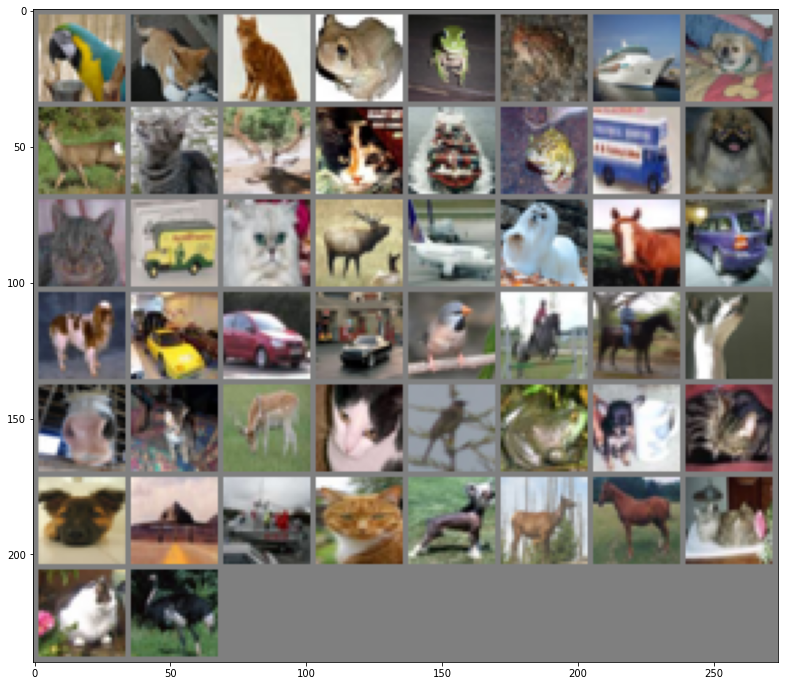

 bird   cat   cat  frog  frog  frog  ship   dog  deer   cat  deer   cat  ship  frog truck   dog   cat truck   cat  deer plane   dog horse   car   dog   car   car   car  bird horse horse   dog horse   cat  deer   cat  bird  frog   dog   cat   dog plane  ship   cat   dog  deer horse   cat   cat  bird


In [673]:
def imshow(img):
    img = img / 2 + 0.5 
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

#### 3.4 ResNet: обучем на CIFAR10

In [709]:
model = ResidualNet18()

In [718]:
optimizer = torch.optim.SGD(model.parameters(), lr=5e-3)

In [719]:
criterion = torch.nn.NLLLoss()

In [722]:
n_print_loss = 100
if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')

model = model.to(device)

for epoch in range(5):
    running_loss = 0.0
    for i, data in tqdm(enumerate(trainloader, 0), total=50000/batch_size):
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % n_print_loss == (n_print_loss - 1): 
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

  0%|          | 0/500.0 [00:00<?, ?it/s]

[1,   100] loss: 0.044
[1,   200] loss: 0.043
[1,   300] loss: 0.042
[1,   400] loss: 0.041
[1,   500] loss: 0.042


  0%|          | 0/500.0 [00:00<?, ?it/s]

[2,   100] loss: 0.035
[2,   200] loss: 0.035
[2,   300] loss: 0.036
[2,   400] loss: 0.035
[2,   500] loss: 0.036


  0%|          | 0/500.0 [00:00<?, ?it/s]

[3,   100] loss: 0.029
[3,   200] loss: 0.028
[3,   300] loss: 0.028
[3,   400] loss: 0.029
[3,   500] loss: 0.028


  0%|          | 0/500.0 [00:00<?, ?it/s]

[4,   100] loss: 0.021
[4,   200] loss: 0.021
[4,   300] loss: 0.021
[4,   400] loss: 0.023
[4,   500] loss: 0.022


  0%|          | 0/500.0 [00:00<?, ?it/s]

[5,   100] loss: 0.014
[5,   200] loss: 0.014
[5,   300] loss: 0.014
[5,   400] loss: 0.015
[5,   500] loss: 0.017
Finished Training


#### 3.5 ResNet: замеряем качество

In [728]:
from sklearn.metrics import confusion_matrix

In [724]:
correct_labels = []
predicted_labels = []

model = model.to('cpu')

with torch.no_grad():
    for data in tqdm(testloader):
        images, labels = data
        outputs = model(images)
        _, predictions = torch.max(outputs, 1)
        predicted_labels = [*predicted_labels, *predictions]
        correct_labels = [*correct_labels, *labels]

  0%|          | 0/100 [00:00<?, ?it/s]

In [725]:
matrix = confusion_matrix(correct_labels, predicted_labels)

In [726]:
def plot_confusion_matrix(mtx, cls_names):
    fig, ax = plt.subplots()
    im = ax.imshow(mtx, cmap="seismic")
    
    try:
        ax.set_xticks(np.arange(len(cls_names)))
        ax.set_xticklabels(cls_names)
        ax.set_yticks(np.arange(len(cls_names)))
        ax.set_yticklabels(cls_names)
    except:
        # matplotlib api changed
        pass
        
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(cls_names)):
        for j in range(len(cls_names)):
            text = ax.text(j, i, mtx[i, j],
                           ha="center", va="center")
    
    acc = (np.eye(len(mtx)) * mtx).sum() / (mtx.sum() + 1e-4)
    ax.set_title(f"Confusion matrix CIFAR10. Accuracy: {acc * 100: .2f} %")
    fig.tight_layout()
    plt.show()

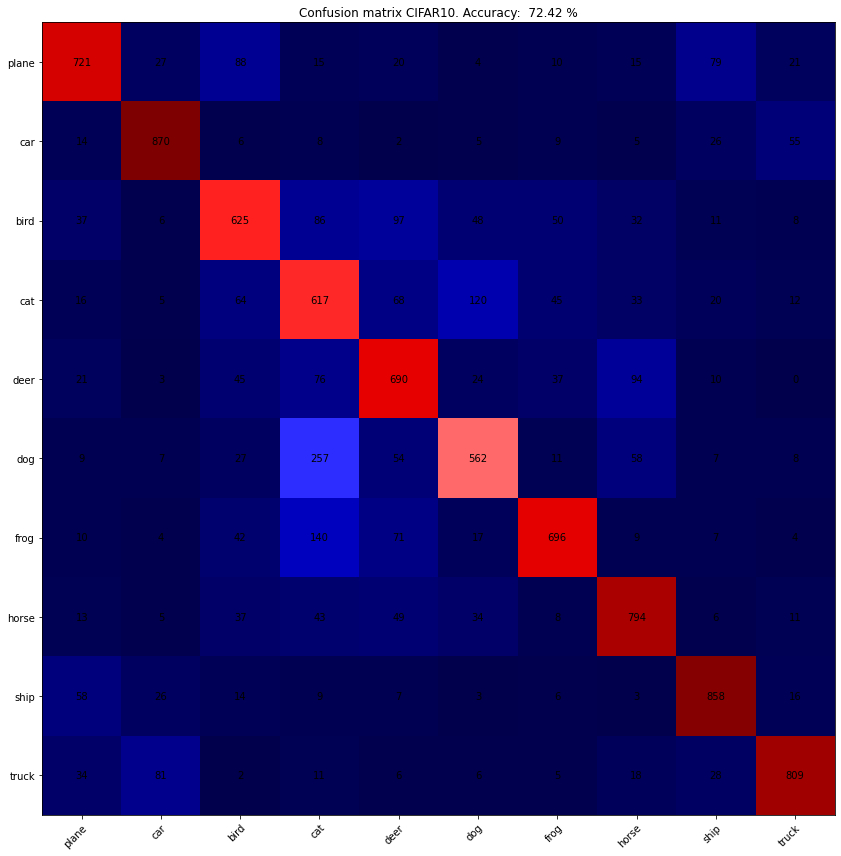

In [727]:
plot_confusion_matrix(matrix, classes)